# Import library

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [5]:
np.random.seed(42)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [7]:
#@title Helper functions {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

# Helper functions
def draw_grid(x_lim=np.array([-4, 4]), y_lim=np.array([-4, 4])):
    """Draw an empty grid"""
    ax = plt.gca()
    # Draw ticks and grid
    for i in range(int(x_lim.min()), int(x_lim.max())):
        ax.axvline(i, linestyle='--', color='#ecf0f1', zorder=0)
        ax.plot([i, i], [0.05, -0.05], color='#2c3e50')
    for i in range(int(y_lim.min()), int(y_lim.max())):
        ax.axhline(i, linestyle='--', color='#ecf0f1', zorder=0)
        ax.plot([0.05, -0.05], [i, i], color='#2c3e50')
    # x and y axis
    ax.axhline(0, color='#2c3e50', zorder=0)
    ax.axvline(0, color='#2c3e50', zorder=0)
    ax.scatter([0], [0], color='#c0392b', zorder=0)

    ax.grid(False)
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)

# Polynomial Features

![](https://i.imgur.com/lMipuKW.png)



A polynomial degree 1 gives us the simple linear regression model:

$$
\hat{y} = wx + b,\ with\ x, \hat{y} \in R
$$

By adding $x^2$ as another feature, the model becomes a quadratic function of $x$:

$$
\hat{y} = w_1x + w_2x^2 + b
$$

We can continue to add more powers of $x$ as additional features to obtain a polynomial of degree $n$

$$
\hat{y} = b + \sum_{i=1}^n{w_ix^i}
$$

In [20]:
df = pd.read_csv('https://raw.githubusercontent.com/dhminh1024/practice_datasets/master/overfitting_underfitting_dataset.csv')
x = df[['X']].values
y = df[['Y']].values

In [9]:
df.head()

,X,Y
0,-5.000000,-38.072172
1,-4.907407,-26.810358
2,-4.691358,-23.012746
3,-4.629630,-17.362182
4,-4.382716,-24.947186


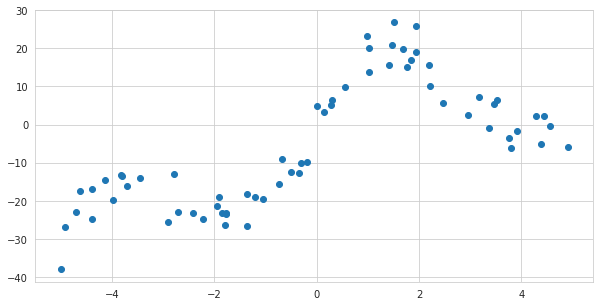

In [10]:
x = df[['X']].values
y = df[['Y']].values

# Let's plot the dataset using plt.scatter()
plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.show()

In [11]:
from sklearn.preprocessing import PolynomialFeatures

In [12]:
# Define a instance of PolynomialFeatures 
poly_reg = PolynomialFeatures(degree = 2,include_bias=False)

X_poly = poly_reg.fit_transform(x)

In [13]:
x.shape

(65, 1)

In [14]:
X_poly.shape

(65, 2)

In [15]:
print(x[:5])
print(X_poly[:5])

[[-5.        ]
 [-4.90740741]
 [-4.69135802]
 [-4.62962963]
 [-4.38271605]]
[[-5.         25.        ]
 [-4.90740741 24.08264746]
 [-4.69135802 22.00884012]
 [-4.62962963 21.43347051]
 [-4.38271605 19.20819997]]


In [16]:
#@title Visualize linear regression {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return 10*np.sin(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degree = 1

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 1

    
def visualize(degree):
    fig, ax = plt.subplots(figsize=(6, 6))
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degree,
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # # Evaluate the models using crossvalidation
    # scores = cross_val_score(pipeline, X[:, np.newaxis], y,
    #                          scoring="neg_mean_squared_error", cv=10)
    scores = mean_squared_error(pipeline.predict(X[:,np.newaxis]),y)
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-20,20))
    plt.legend(loc="best")
    # plt.title("Degree {}\nMSE = {:.2f}(+/- {:.2f})".format(
    #     degree, -scores.mean(), scores.std()), fontsize=20)
    plt.title(f'Degree {degree}\nMSE = {scores}',fontsize=20)
    plt.show()

In [17]:
#@title Interactive plot {display-mode: "form"}

# from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

degree = widgets.IntSlider(1, 1, 40, 2, description='Degree = ')
ui = widgets.VBox([degree])
out = widgets.HBox([ui, widgets.interactive_output(visualize, 
                                 {'degree':degree})])

display(out)

# Bias - Variance tradeoff

The bias-variance tradeoff is a central problem in supervised learning. Ideally, one wants to choose a model that both accurately captures the regularities in its training data, but also generalizes well to unseen data. Unfortunately, it is typically impossible to do both simultaneously.

$$
Err(x) = \left(E[\hat{f}(x)]-f(x)\right)^2 + E\left[\left(\hat{f}(x)-E[\hat{f}(x)]\right)^2\right] +\sigma_e^2
$$

$$
Err(x) = \mathrm{Bias}^2 + \mathrm{Variance} + \mathrm{Irreducible\ Error}
$$
- $y$: The label. Each data point has a label $y$
- $f(x)$: The true underlying function, so that $y = f(x) + $small_error
- $\hat{f}(x)$: Your model, in which you try to find the true $f(x)$
- $E[\hat{f}(x)]$: The expected prediction of **your models**. Imagine you could repeat the whole model building process more than once: each time you gather new data and run a new analysis creating a new model.
- $\sigma_e$: irreducible error, is the noise term in the true relationship that cannot fundamentally be reduced by any model.

 **High-variance learning methods may be able to represent their training set well but are at risk of overfitting** to noisy or unrepresentative training data. 
 - Models with high variance are usually **more complex** (e.g. higher-order regression), enabling them to represent the training set more accurately. 
 - However, in the process, they may also represent a large noise component in the training set, making their predictions less accurate
 
**High bias methods typically produce simpler models that don't tend to overfit but may underfit their training data failing to capture important regularities.**
- Models with higher bias tend to be relatively simple (low-order or even linear regression polynomials), and may produce lower variance predictions when applied beyond the training set.


Source: https://web.archive.org/web/20210102010952/http://scott.fortmann-roe.com/docs/BiasVariance.html

<img src="https://i.imgur.com/ssAwUQc.png" width="50%"/>



![](https://i.imgur.com/HbLCt8e.png)



**Conclusion**: At its root, dealing with bias and variance is really about dealing with over- and under-fitting. Bias is reduced and variance is increased in relation to model complexity. As more and more parameters are added to a model, the complexity of the model rises and variance becomes our primary concern while bias steadily falls. **More complex models overfit while the simplest models underfit**.

# How to observe Overfitting/ Underfitting

The central challenge in machine learning is that **the model must perform well on new, previously unseen input**. 

The ability to perform well on previously unobserved inputs is called **generalization**.

We usually split your dataset $D$ into three subsets: $D_{TR}$ as the training set, $D_{VA}$ as the validation set, $D_{TE}$ as the test set. 

![](https://miro.medium.com/max/700/1*Nv2NNALuokZEcV6hYEHdGA.png)



>*Why do we need $D_{VA}$?*
>
>In the training process, the model need to be validated on $D_{VA}$. If the error is too large, the model will get revised based on $D_{TR}$, and validate again on $D_{VA}$. This process will keep going back and forth until it gives low loss on $D_{VA}$.

In [21]:
df = pd.read_csv('https://raw.githubusercontent.com/dhminh1024/practice_datasets/master/overfitting_underfitting_dataset.csv')
x = df[['X']].values
y = df[['Y']].values

In [37]:
# Split the data in 80% training and 20% validation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=102)

In [31]:
X_train.shape,X_test.shape

((52, 1), (13, 1))

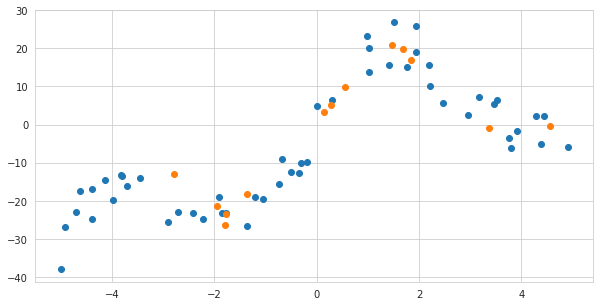

In [38]:
plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.show()

In [50]:
degree = 20 # hyperparameter

MSE on train set: 9.28488217718147
MSE on validation set: 40.694330457628816


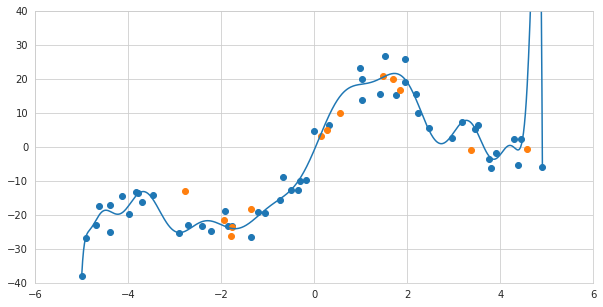

In [51]:
#@title Building Polynomial Linear Regression with sklearn {display-mode: "form"}

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error


# Define a instance of LinearRegression called 'lm'
lm = LinearRegression()

# Define a instance of PolynomialFeatures with degree=4 called 'poly_reg'
poly_reg = PolynomialFeatures(degree = degree)

# Fit and transform 'X_train', 'X_test' with the PolynomialFeatures and save the result in 'X_train_poly' and 'X_test_poly'
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)
# Fitting the Linear Regression Model to the training set (X_train_poly)
lm.fit(X_train_poly, y_train)

# Predict test set and save the result in 'y_test_predict'
y_test_predict = lm.predict(X_test_poly)
y_train_predict = lm.predict(X_train_poly)
print(f'MSE on train set: {mean_squared_error(y_train,y_train_predict)}')
print(f'MSE on validation set: {mean_squared_error(y_test,y_test_predict)}')


# plotting purposes
x_plot = np.linspace(x.min(), x.max(), 1000).reshape(-1, 1)
y_plot = lm.predict(poly_reg.fit_transform(x_plot))
plt.figure(figsize=(10, 5))
plt.plot(x_plot, y_plot)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.xlim(-6, 6)
plt.ylim(-40, 40)
plt.show()

### Detecting High Bias and High Variance

**High Bias Low Variance (Underfitting)**: *Training error is high*
- How to fix this problem:
  - Use more complex model (e.g. higher polynomial, or kernel methods)
  - Adding features that have strong predictive powers

**High Variance Low Bias (Overfitting)**: *Training error is low, but it is much lower than test error* (test error is higher comparing to train error)
- How to fix this problem:
  - Add more training data
  - Reduce the model complexity (e.g. Regularization)

![](https://www.researchgate.net/profile/Hayder_Al-Behadili/publication/325999203/figure/fig4/AS:641844216074241@1530038994324/Overfitting-and-underfitting-effect-on-error.png)